<a href="https://colab.research.google.com/github/JavierAlbert/Variational_Autoencoders/blob/master/convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Autoencoder

Let's move now to concolutional autoencoders. As everything with images, we expect convolutional neural networks to perform better. We will use max pooling layers for the encoder section and upsampling layers for the decoder section. Now we won't format the images to a 784 line vector so we can preserve the structure that the convolutional layers benefit from. 

**Encoder:**
- Layer 1: 16 convolutional units of 3x3 with ReLu activation function and followed by 2x2 max pooling
- Layer 2: 8 convolutional units of 3x3 with ReLu activation function and followed by 2x2 max pooling
- Layer 3: 8 convolutional units of 3x3 with ReLu activation function and followed by 2x2 max pooling

**Decoder:**
- Layer 1: 8 convolutional units of 3x3 with ReLu activation function and followed by 2x2 up sampling
- Layer 2: 8 convolutional units of 3x3 with ReLu activation function and followed by 2x2 up sampling
- Layer 3: 16 convolutional units of 3x3 with ReLu activation function and followed by 2x2 up sampling
- Layer 4: 1 convolutional unit of 3x3 with Sigmoid activation function

Total parameters: 4385  
Encoded dimension: (4, 4, 8) = 128


In [0]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import numpy as np

In [0]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
# Reshape images to 784 pixels and stack them
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
input_img = Input(shape=(28, 28, 1))

# Define encoding layers  
encode = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encode = MaxPooling2D((2, 2), padding='same')(encode)
encode = Conv2D(8, (3, 3), activation='relu', padding='same')(encode)
encode = MaxPooling2D((2, 2), padding='same')(encode)
encode = Conv2D(8, (3, 3), activation='relu', padding='same')(encode)
encode = MaxPooling2D((2, 2), padding='same')(encode)

# Define decoding layers
decode = Conv2D(8, (3, 3), activation='relu', padding='same')(encode)
decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(8, (3, 3), activation='relu', padding='same')(decode)
decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(16, (3, 3), activation='relu')(decode)
decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decode)

# Define Model
autoencoder = Model(input_img, decode)

# Compile Model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
# Let's take a peak at the architecture
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [13]:
# Fit autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0)

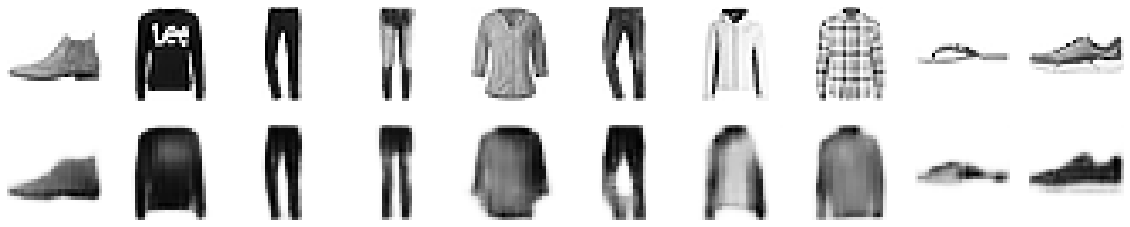

In [14]:
# Let's use the autoencoder on some of the test images
decoded_imgs = autoencoder.predict(x_test)

# Now we can take a look
plt.figure(figsize=(20, 4))
for i in range(10):
  
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()